# Directional Analysis of Dynamic LISAs

This notebook demonstrates how to use Rose diagram based inference for directional LISAs.

In [1]:
import pysal.lib 
import numpy as np
from pysal.explore.giddy.directional import Rose
%matplotlib inline

In [2]:
f = open(pysal.lib.examples.get_path('spi_download.csv'), 'r')
lines = f.readlines()
f.close()

In [3]:
lines = [line.strip().split(",") for line in lines]
names = [line[2] for line in lines[1:-5]]
data = np.array([list(map(int, line[3:])) for line in lines[1:-5]])

In [4]:
sids  = list(range(60))
out = ['"United States 3/"',
      '"Alaska 3/"',
      '"District of Columbia"',
      '"Hawaii 3/"',
      '"New England"','"Mideast"',
       '"Great Lakes"',
       '"Plains"',
       '"Southeast"',
       '"Southwest"',
       '"Rocky Mountain"',
       '"Far West 3/"']

In [5]:
snames = [name for name in names if name not in out]

In [6]:
sids = [names.index(name) for name in snames]

In [7]:
states = data[sids,:]
us = data[0]
years = np.arange(1969, 2009)

In [8]:
rel = states/(us*1.)

In [9]:
gal = pysal.lib.io.open(pysal.lib.examples.get_path('states48.gal'))
w = gal.read()
w.transform = 'r'

In [10]:
Y = rel[:, [0, -1]]

In [11]:
Y.shape

(48, 2)

In [12]:
Y

array([[0.71272158, 0.83983287],
       [0.91110532, 0.85393454],
       [0.68196038, 0.80573518],
       [1.181439  , 1.08538102],
       [0.96115746, 1.06906586],
       [1.25677789, 1.39952248],
       [1.14859228, 1.00773478],
       [0.9535975 , 0.9765967 ],
       [0.82090719, 0.86781238],
       [0.85088634, 0.82257262],
       [1.12956204, 1.05319837],
       [0.9624609 , 0.86064962],
       [0.95542231, 0.93021289],
       [0.92674661, 0.96547951],
       [0.77267987, 0.79775169],
       [0.75234619, 0.90588938],
       [0.81803962, 0.90671011],
       [1.09462982, 1.20319339],
       [1.09098019, 1.27472145],
       [1.08107404, 0.86920513],
       [0.98409802, 1.07035913],
       [0.62643379, 0.75604357],
       [0.93039625, 0.9110376 ],
       [0.85870699, 0.86161958],
       [0.93091762, 0.97368683],
       [1.18091762, 1.02422404],
       [0.97627737, 1.08493335],
       [1.17309698, 1.277308  ],
       [0.76120959, 0.83142658],
       [1.19212722, 1.2125199 ],
       [0.

In [13]:
np.random.seed(100)
r4 = Rose(Y, w, k=4)

## Visualization

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x1a2a7efb00>)

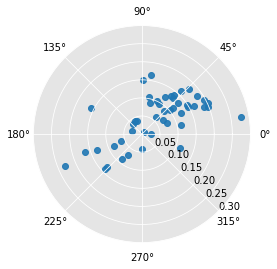

In [14]:
r4.plot()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x1a2aa8ccc0>)

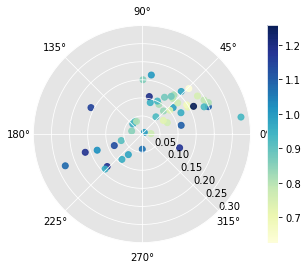

In [15]:
r4.plot(Y[:,0]) # condition on starting relative income

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x1a2ac076d8>)

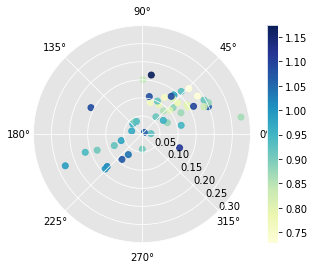

In [16]:
r4.plot(attribute=r4.lag[:,0]) # condition on the spatial lag of starting relative income

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a29fafb38>)

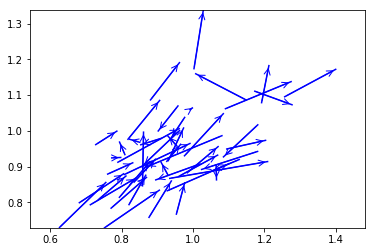

In [17]:
r4.plot_vectors() # lisa vectors

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2ae61f28>)

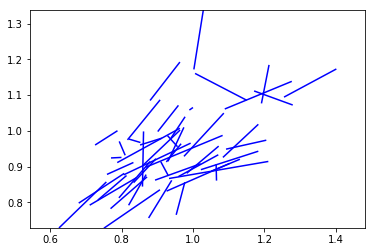

In [18]:
r4.plot_vectors(arrows=False)

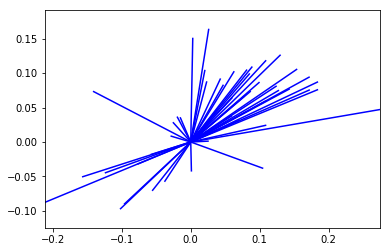

In [19]:
r4.plot_origin() # origin standardized

## Inference

The Rose class contains methods to carry out inference on the circular distribution of the LISA vectors. The first approach is based on a two-sided alternative where the null is that the distribution of the vectors across the segments reflects independence in the movements of the focal unit and its spatial lag. Inference is based on random spatial permutations under the null.

In [20]:
r4.cuts

array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])

In [21]:
r4.counts

array([32,  5,  9,  2])

In [22]:
np.random.seed(1234)

In [23]:
r4.permute(permutations=999)

In [24]:
r4.p

array([0.028, 0.   , 0.002, 0.004])

Here all the four sector counts are signficantly different from their expectation under the null.

A directional test can also be implemented. Here the direction of the departure from the null due to positive co-movement of a focal unit and its spatial lag over the time period results in two  two general cases. For sectors in the positive quadrants (I and III), the observed counts are considered extreme if they are larger than expectation, while for the negative quadrants (II, IV) the observed counts are considered extreme if they are small than the expected counts under the null.

In [25]:
r4.permute(alternative='positive', permutations=999)
r4.p

array([0.013, 0.001, 0.001, 0.013])

In [26]:
r4.expected_perm

array([27.24824825, 11.56556557,  2.43443443,  6.75175175])

Finally, a directional alternative reflecting negative association between the movement of the focal unit and its lag has the complimentary interpretation to the positive alternative: lower counts in I and III, and higher counts in II and IV relative to the null.

In [27]:
r4.permute(alternative='negative', permutations=999)
r4.p

array([0.996, 1.   , 1.   , 0.996])